## _The goal of this project is to predict whether a person makes over 50K a year or not given their demographic variation._ 

### IMPORTING THE DEPENDENCIES:

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### DATA EXPLORATION & PRIMARY PRE-PROCESSING:

In [2]:
#load the data
df = pd.read_csv("C:/Users/Administrator/Desktop/Intellipat/Python ML/Census Income Project/census-income.csv",skipinitialspace = True)

In [3]:
df.head() #top 5 rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Unnamed: 14       object
dtype: object

In [5]:
#renaming the last column
df = df.rename(columns={"Unnamed: 14":"annual_income"})

In [6]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.shape

(32561, 15)

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
annual_income     object
dtype: object

In [10]:
#Categorical target to numerical target
df['annual_income'] = np.where(df['annual_income'] == ">50K", 1, 0)

In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [12]:
#Check for null values
df.isnull() #boolean op

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [14]:
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [15]:
df.loc[df["workclass"]=="?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,0
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0


In [16]:
df.loc[df["occupation"]=="?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,0
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,1
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,0


In [17]:
#drop
df.drop(df[df['workclass']=='?'].index, inplace=True)
df.drop(df[df['occupation']=='?'].index, inplace=True)

In [18]:
df.loc[df["occupation"]=="?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income


In [19]:
#duplicate rows
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,0
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,0
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,0
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,0
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,0
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,0
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,0
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,0
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,0


In [20]:
df.shape

(30718, 15)

In [21]:
df.drop_duplicates(inplace=True) #-24

In [22]:
df.shape

(30694, 15)

### DATA VISUALIZATION:

#### I. Age 

Average people's age is 44(approx.) for income > 50k which is more compared to income <= 50k.

In [23]:
age_df=df[(df['annual_income'] ==  1)]

In [24]:
age_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,1
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,1
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1


In [25]:
age_df.groupby('age')['age'].mean().mean()

52.10769230769231

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


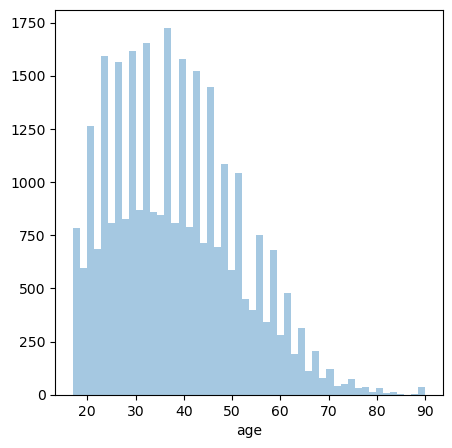

In [26]:
plt.figure(figsize=(5,5))
sns.distplot(df['age'],kde=False)
plt.show()

In [27]:
(df.age>70).sum()  

389

<font color = "orange"> __: : data is right skewed w.r.t age but since datapoints > 70 corresponds to a mere 1.2%, it is not an issue__
</font>

#### II. Hours per Week

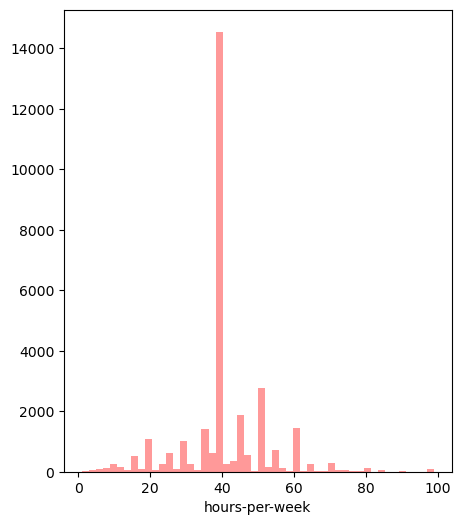

In [28]:
plt.figure(figsize=(5,6))
sns.distplot(df['hours-per-week'],kde=False,color='r')
plt.show()

<font color = "orange"> __: : majority population spend between 40-50 hr/wk__
</font>

#### III. Education

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


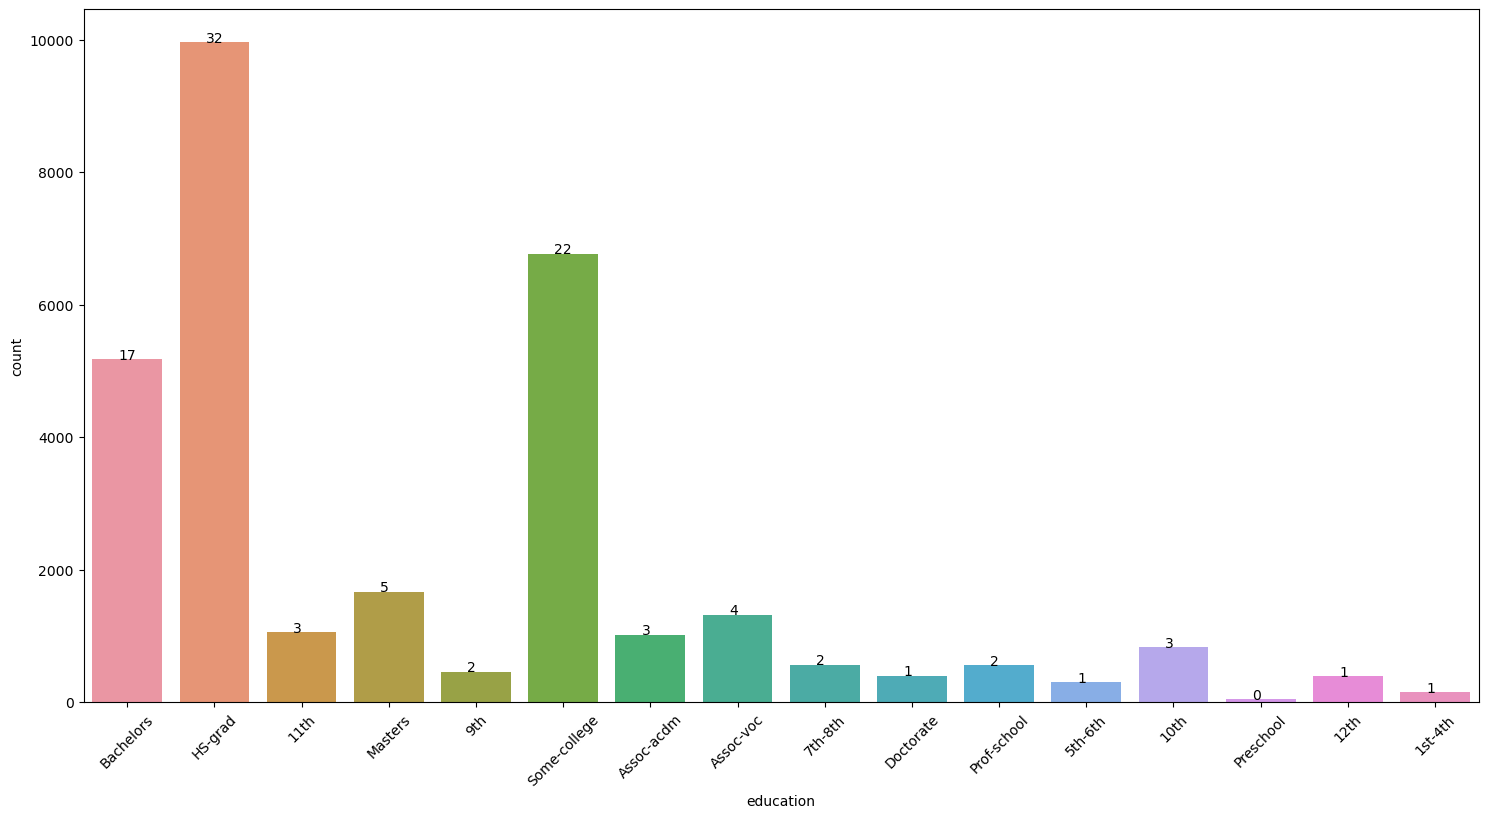

In [29]:
plt.figure(figsize=(18,9))
ax = sns.countplot(df['education'])

for p in ax.patches:
    
    x = p.get_x()+p.get_width()/2 - 0.1
    y = p.get_height() + 3
    t = round((p.get_height()/df.shape[0])*100)
    
    ax.text(x,y,t)
    plt.xticks(rotation = 45)
plt.show()

<font color = "orange"> __: : most people are HS-grad (32%) followed by college goers (22%) and Bachelors (17%)__
</font>

#### IV. Workclass

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


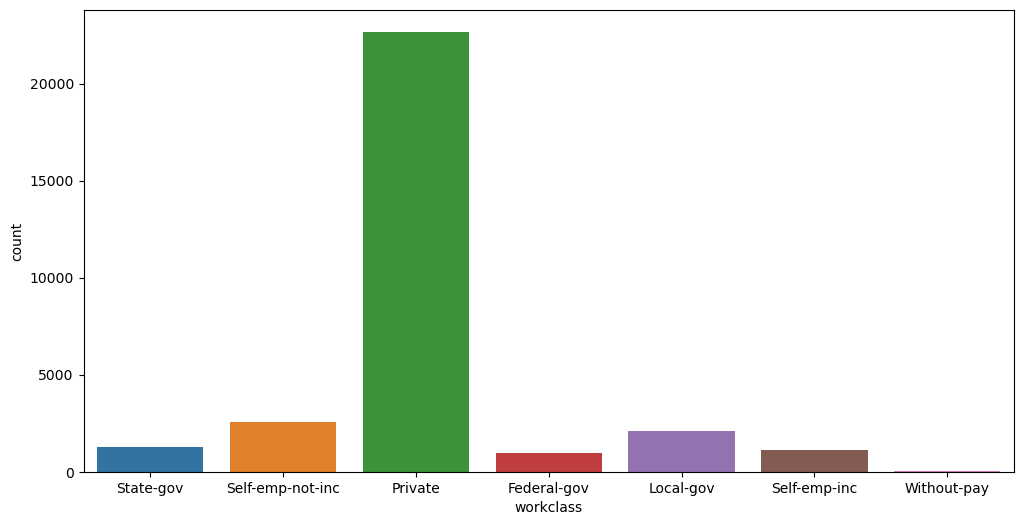

In [30]:
plt.figure(figsize=(12,6))

sns.countplot(df['workclass'])
plt.show()

<font color = "orange"> __: : most people are working in private sector__
</font>

#### V. Marital Status

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


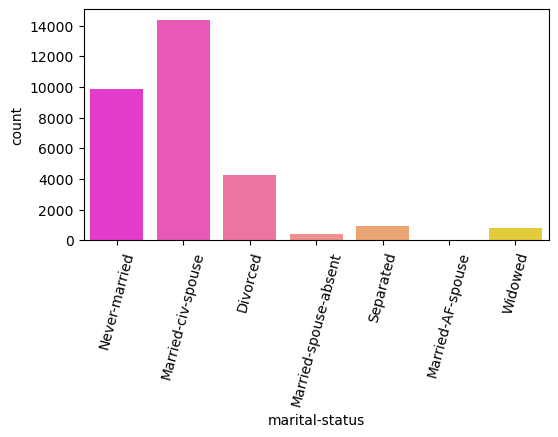

In [31]:
plt.figure(figsize=(6,3))
sns.countplot(df['marital-status'],palette='spring')
plt.xticks(rotation = 75)
plt.show()

<font color = "orange"> __: : most people are married with a civilian spouse followed by people who are never married.__
</font>

#### VI. Occupation

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


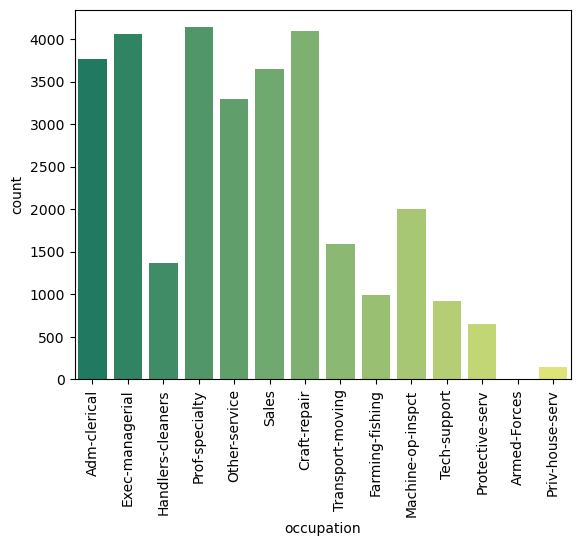

In [32]:
sns.countplot(df['occupation'],palette='summer')
plt.xticks(rotation = 90)
plt.show()

<font color = "orange"> __: : </br>
Prof-specialty and Craft-repair have the maximum count of samples but Exec-managerial, Adm-clerical and Sales have comparable number of observations.</br>
Armed-Forces has minimum samples in the occupation attribute of this database.__
</font>

#### VII. Gender

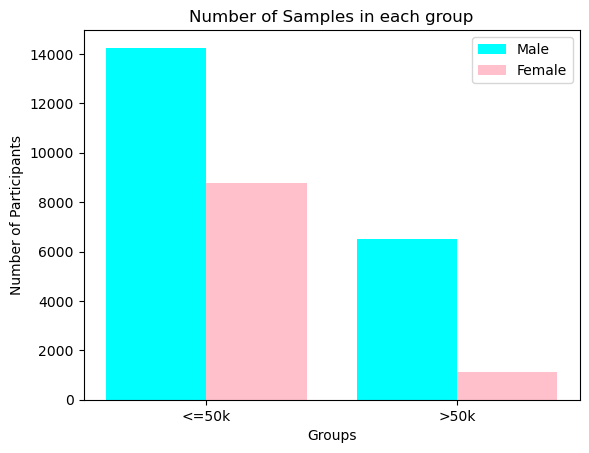

In [36]:
#income analysis
label=["<=50k",">50k"]

dfm=df[df['sex']=='Male']
male=dfm['annual_income'].value_counts().tolist()

dfm=df[df['sex']=='Female']
female=dfm['annual_income'].value_counts().tolist()

X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male',color=['cyan'])
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female',color=['pink'])
  
plt.xticks(X_axis, label)
plt.xlabel("Groups")
plt.ylabel("Number of Participants")
plt.title("Number of Samples in each group")
plt.legend()
plt.show()

In [37]:
print("men",male)
print("women",female)
print("distribution",df.groupby('sex')['sex'].count().tolist())

men [14252, 6521]
women [8794, 1127]
distribution [9921, 20773]


In [38]:
df.groupby('sex')['hours-per-week'].mean()

sex
Female    36.961093
Male      42.859144
Name: hours-per-week, dtype: float64

#### VIII. Miscellaneous

In [39]:
df.groupby('annual_income')['annual_income'].count()

annual_income
0    23046
1     7648
Name: annual_income, dtype: int64

### FEATURE ENGINEERING:

In [40]:
col = df.columns
col

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [41]:
#label encoding 
col_list = []
for i in df.columns:
    if (df[i].dtype=='object'):
        col_list.append(i)

In [42]:
col_list #object columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [43]:
#label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() #create an object

#df['workclass'] = labelencoder.fit_transform(df['workclass'])

for i in col_list:
    df[i] = labelencoder.fit_transform(df[i])

In [44]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,39,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,39,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,39,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,39,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,5,0


In [45]:
#multicollinearity
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for i in df.columns:
    if ((df[i].dtype!='object') &(i!="annual_income")): #only numerical columns
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

           Feature        VIF
0              age   9.283050
1        workclass   6.237905
2           fnlwgt   4.035839
3        education   9.393216
4    education-num  18.542551
5   marital-status   3.980500
6       occupation   3.208851
7     relationship   2.577821
8             race  17.746176
9              sex   4.574560
10    capital-gain   1.045754
11    capital-loss   1.063318
12  hours-per-week  12.854276
13  native-country  19.765511


In [46]:
df = df.drop(["native-country"],axis=1)

In [47]:
#multicollinearity
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for i in df.columns:
    if ((df[i].dtype!='object') &(i!="annual_income")): #only numerical columns
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

           Feature        VIF
0              age   8.982990
1        workclass   6.204713
2           fnlwgt   4.022385
3        education   9.265626
4    education-num  18.069119
5   marital-status   3.910208
6       occupation   3.202773
7     relationship   2.496363
8             race  15.652625
9              sex   4.533027
10    capital-gain   1.044039
11    capital-loss   1.062937
12  hours-per-week  12.619761


In [48]:
df = df.drop(["education-num"],axis=1)

In [49]:
#multicollinearity
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for i in df.columns:
    if ((df[i].dtype!='object') &(i!="annual_income")): #only numerical columns
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

           Feature        VIF
0              age   8.757644
1        workclass   6.159821
2           fnlwgt   4.011709
3        education   7.594221
4   marital-status   3.865664
5       occupation   3.125947
6     relationship   2.485694
7             race  15.048481
8              sex   4.531763
9     capital-gain   1.035526
10    capital-loss   1.058408
11  hours-per-week  11.847536


In [50]:
df = df.drop(["race"],axis=1)

In [51]:
#multicollinearity
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for i in df.columns:
    if ((df[i].dtype!='object') &(i!="annual_income")): #only numerical columns
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

           Feature        VIF
0              age   8.056945
1        workclass   5.998595
2           fnlwgt   3.947677
3        education   7.274447
4   marital-status   3.744083
5       occupation   3.098273
6     relationship   2.413597
7              sex   4.389726
8     capital-gain   1.034797
9     capital-loss   1.058367
10  hours-per-week  11.013122


In [52]:
df  =df.drop(["hours-per-week"],axis=1)

In [53]:
#multicollinearity
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for i in df.columns:
    if ((df[i].dtype!='object') &(i!="annual_income")): #only numerical columns
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

          Feature       VIF
0             age  7.138318
1       workclass  5.830733
2          fnlwgt  3.878136
3       education  6.700687
4  marital-status  3.726598
5      occupation  3.058584
6    relationship  2.391299
7             sex  4.021644
8    capital-gain  1.033348
9    capital-loss  1.057029


In [54]:
x

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss
0,39,5,77516,9,4,0,1,1,2174,0
1,50,4,83311,9,2,3,0,1,0,0
2,38,2,215646,11,0,5,1,1,0,0
3,53,2,234721,1,2,5,0,1,0,0
4,28,2,338409,9,2,9,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,2,12,5,0,0,0
32557,40,2,154374,11,2,6,0,1,0,0
32558,58,2,151910,11,6,0,4,0,0,0
32559,22,2,201490,11,4,0,3,1,0,0


In [55]:
y=df["annual_income"]

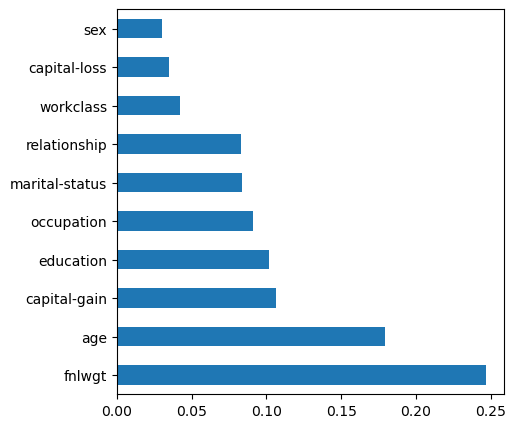

In [56]:
X=df.drop(['annual_income'],axis=1)
y=df['annual_income']

from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()
model.fit(X,y)

df1=pd.Series(model.feature_importances_,index=X.columns)

plt.figure(figsize=(5,5))
df1.nlargest(10).plot(kind='barh')
plt.show()

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=56)

## LogisticRegression:

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train) #model fitting/ training

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
test_pred = lr.predict(x_test)

In [60]:
test_pred #y_test

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
from sklearn.metrics import *
accuracy_score(y_test, test_pred)

0.7847757628406993

In [62]:
confusion_matrix(y_test, test_pred)

array([[6658,  273],
       [1709,  569]], dtype=int64)

## DecisionTreeClassifier:

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
test_pred = dt.predict(x_test)
test_pred

array([0, 1, 0, ..., 0, 1, 0])

In [64]:
from sklearn.metrics import *
accuracy_score(y_test, test_pred)

0.803344554240417

In [65]:
confusion_matrix(y_test, test_pred)

array([[5978,  953],
       [ 858, 1420]], dtype=int64)

In [66]:
x_test

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss
18972,24,2,240137,3,4,5,1,1,0,0
31869,34,3,177675,15,2,3,0,1,0,0
1110,35,3,289430,12,2,11,0,1,0,0
16588,70,4,36311,9,2,9,0,1,20051,0
3004,25,2,117589,7,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
13825,54,4,205066,0,2,2,0,1,0,0
17893,35,2,139086,11,2,5,0,1,0,0
28593,50,5,172970,11,2,13,0,1,0,0
1068,30,2,181651,9,2,3,0,1,0,0


## Random Forest Classifier:

In [67]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6931
           1       0.73      0.63      0.67      2278

    accuracy                           0.85      9209
   macro avg       0.80      0.77      0.79      9209
weighted avg       0.84      0.85      0.85      9209



## PREDICTIONS:

In [68]:
#[45,3,6678,2,4,5,1,1,1,1] = 0, 1

In [69]:
lr.predict([[45,3,6678,2,4,5,1,1,1,1]]) #no.of values should be same as the x_test

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [70]:
dt.predict([[45,3,6678,2,4,5,1,1,1,1]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [71]:
rf.predict([[45,3,6678,2,4,5,1,1,1,1]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

## FINAL CONCLUSIONS:

<font color = "black">
1. Nearly 75% of the data recorded in this database earns <=50k.</br>
2. Average age of people earning >50k is around 52 </br>
3. Higher education is directly correlated with a better chance of earning >50k.</br>
4. Females are more likely to be earning <= 50k (nearly 89% of the females recorded earn <=50k).</br>
5. Average working hour of females is less when compared to males.</br>
</font>